The Python script starts by importing various libraries and then reads a CSV file named 'TheSocialDilemma.csv' using the Pandas library. Let me break down the different parts of the code for you:

1. **Importing Libraries**: The code begins by importing several Python libraries, including:
   - `numpy` and `pandas` for data manipulation.
   - `seaborn` and `matplotlib.pyplot` for data visualization.
   - `nltk` for natural language processing tasks.
   - `os` for working with the operating system.
   - `datetime` for working with dates and times.
   - Various modules from `sklearn` (scikit-learn) for machine learning and natural language processing tasks.
   - `wordcloud` for creating word clouds.
   - `BeautifulSoup` for parsing HTML content.
   - `emoji` for handling emojis.
   - `spacy` for natural language processing tasks.
   - `warnings` for managing warning messages.

2. **Configuration and Data Loading**: It sets some configurations for displaying Pandas dataframes and suppresses warnings. Then, it loads data from a CSV file named 'TheSocialDilemma.csv' into a Pandas DataFrame called `data`.

3. **Display Data**: Finally, it displays the first row (or record) of the loaded data using the `data.head(1)` command. This is done to check the structure and content of the dataset.

In [2]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import emoji
import random, itertools
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import spacy
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import string
import spacy
pd.set_option('display.max_colwidth', None)
data=pd.read_csv('TheSocialDilemma.csv')
data.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Media Thought Leader | Keynote Speaker | Dynamic Live Video Host | Ambassador | 🇨🇦🏴󠁧󠁢󠁳󠁣󠁴󠁿🇺🇸,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebook I'm also reminded of the very poignant quote by French philosopher… https://t.co/CA52aepW6K,NaN,Twitter Web App,False,Neutral


In this code snippet, modifications to the `data` DataFrame is done by creating a new DataFrame called `data_new`. Let's break down the code step by step:

1. `data_new = data.drop([...], axis=1)`: This line of code is using the `.drop()` method provided by Pandas to remove specific columns (features) from the `data` DataFrame. The columns to be dropped are specified within the square brackets `['user_name', 'user_location', ...]`. These columns are listed as strings and correspond to the columns you want to remove from the DataFrame.

2. `axis=1`: The `axis=1` argument indicates that you want to drop columns (as opposed to rows). In Pandas, `axis=0` is used to refer to rows, and `axis=1` is used to refer to columns.

3. `data_new.head()`: After removing the specified columns, this line of code displays the first few rows of the resulting `data_new` DataFrame using the `.head()` method. This is a common practice to check the structure and content of the modified DataFrame.

In [4]:
data_new=data.drop(['user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','hashtags','source','is_retweet'],axis=1)
data_new.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebook I'm also reminded of the very poignant quote by French philosopher… https://t.co/CA52aepW6K,Neutral
1,"@musicmadmarc @SocialDilemma_ @netflix @Facebook haa, hey Marc. I get what you're saying &amp; don't agree. 🤪\n\nWhicheve… https://t.co/nsVtPHjUs8",Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nIt’s the best 100 minutes you’ll spend in 2020. I bet you💯… https://t.co/GSWCx3E9tG,Positive
3,I watched #TheSocialDilemma last night. I’m scared for humanity. \n\nI’m not sure what to do but I’ve logged out of F… https://t.co/luOBcjCJFb,Negative
4,The problem of me being on my phone most the time while trying to watch #TheSocialDilemma 🤦🏼‍♀️,Positive


In this code, several text preprocessing steps on the "text" column of the `data_new` DataFrame are performed. These preprocessing steps are applied to clean and prepare text data for analysis or natural language processing tasks. Let's go through each step:

1. **Lowercasing**: 
   ```python
   data_new["text"] = data_new["text"].str.lower()
   ```
   This code converts all text in the "text" column to lowercase. This step is common in text preprocessing to ensure that the text is in a consistent case, which can help with text analysis tasks.

2. **URL Removal**:
   ```python
   data_new["text"] = data_new["text"].str.replace('http\S+|www.\S+', '', case=False)
   ```
   This code uses a regular expression to find and replace URLs (web addresses) in the "text" column with an empty string. It effectively removes URLs from the text data.

3. **Removing @words**:
   ```python
   data_new["text"] = data_new["text"].str.replace('@[\w]*', '', case=False)
   ```
   This code uses a regular expression to find and replace words starting with "@" in the "text" column with an empty string. Typically, this step is used to remove Twitter handles or mentions from the text.

4. **Removal of Punctuations**:
   ```python
   PUNCT_TO_REMOVE = string.punctuation

   def remove_punctuation(text):
       return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
   
   data_new["text"] = data_new["text"].apply(lambda text: remove_punctuation(text))
   ```
   Here, a variable `PUNCT_TO_REMOVE` is defined containing all punctuation characters. Then, a function `remove_punctuation` that uses the `translate` method to remove all punctuation characters from the text. Finally, this function is applied to each element in the "text" column, effectively removing all punctuation.

In [5]:
#Lowercasing
data_new["text"] = data_new["text"].str.lower()

#URL removal
data_new["text"] = data_new["text"].str.replace('http\S+|www.\S+', '', case=False)

#Removing @words
data_new["text"] = data_new["text"].str.replace('@[\w]*', '', case=False)

#Removal of Punctuations
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
data_new["text"] = data_new["text"].apply(lambda text: remove_punctuation(text))

data_new.head()

,text,Sentiment
0,im also reminded of the very poignant quote by french philosopher…,Neutral
1,haa hey marc i get what youre saying amp dont agree 🤪\n\nwhicheve…,Neutral
2,go watch “the social dilemma” on netflix\n\nit’s the best 100 minutes you’ll spend in 2020 i bet you💯…,Positive
3,i watched thesocialdilemma last night i’m scared for humanity \n\ni’m not sure what to do but i’ve logged out of f…,Negative
4,the problem of me being on my phone most the time while trying to watch thesocialdilemma 🤦🏼‍♀️,Positive


In this code, preprocessing is continued and the text data stored in the `data_new` DataFrame. Here's what each part of the code does:

1. **Convert to List**:
   ```python
   data = data_new['text'].values.tolist()
   ```
   This line extracts the values from the "text" column of the `data_new` DataFrame and converts them into a Python list. Each element of the list corresponds to a piece of text from the "text" column.

2. **Remove Emails**:
   ```python
   data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
   ```
   This list comprehension iterates over each element (text) in the `data` list and uses a regular expression to remove email addresses. It replaces email addresses (sequences of characters with "@" symbols) with an empty string.

3. **Remove New Line Characters**:
   ```python
   data = [re.sub('\s+', ' ', sent) for sent in data]
   ```
   This line iterates over the `data` list and replaces sequences of one or more whitespace characters (including newline characters) with a single space. This step helps in removing extra spaces and newlines, making the text more consistent.

4. **Remove Distracting Single Quotes**:
   ```python
   data = [re.sub("\'", "", sent) for sent in data]
   ```
   It iterates over the `data` list and remove single quotation marks (apostrophes) from each piece of text. This step is useful to avoid potential issues caused by single quotes.

5. **Print the Processed Data**:
   ```python
   print(data[:1])
   ```
   Finally, the first element of the `data` list is printed to check the result of all the preprocessing steps applied to it.

In [6]:
# Convert to list
data = data_new['text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

[' im also reminded of the very poignant quote by french philosopher… ']


In this code, the Gensim library is used to preprocess the text data further by tokenizing it into words. Here's a breakdown of what the code does:

1. **Importing Gensim**:
   ```python
   import gensim
   ```
   This line imports the Gensim library, which is often used for natural language processing and topic modeling tasks.

2. **Defining a Tokenization Function**:
   ```python
   def sent_to_words(sentences):
       for sentence in sentences:
           yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
   ```
   In this code block, a function `sent_to_words` is defined that takes a list of sentences (or text) as input. Inside the function, it iterates through each sentence, converts it to a string, and uses Gensim's `simple_preprocess` function to tokenize the sentence into a list of words. The `deacc=False` argument indicates that you want to keep accent characters (e.g., accented letters) in words.

3. **Tokenization**:
   ```python
   data_words = list(sent_to_words(data))
   ```
   Here, the `sent_to_words` function is applied to the `data` list, which contains the preprocessed text data. The result is a list of lists, where each inner list represents a tokenized version of a sentence in the text data.

4. **Print Tokenized Data**:
   ```python
   print(data_words[:1])
   ```
   Finally, printing the tokenized version of the first sentence (or document) in the data to check the result.

In [7]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['im', 'also', 'reminded', 'of', 'the', 'very', 'poignant', 'quote', 'by', 'french', 'philosopher']]


In this code, further preprocessing the tokenized text data stored in the `data_words` list is done. The preprocessing steps include removing stopwords and lemmatization. Here's a breakdown of the code:

1. **Importing Libraries**:
   ```python
   from gensim.utils import simple_preprocess
   from nltk.corpus import stopwords
   ```
   This section imports the necessary libraries, including `simple_preprocess` from Gensim and stopwords from NLTK.

2. **Loading SpaCy Model and Defining Stopwords**:
   ```python
   nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
   stop_words = stopwords.words('english')
   ```
   Here, the SpaCy English language model is loaded and disable the parser and named entity recognition components. Also loaded is the English stopwords from NLTK.

3. **Defining the `remove_stopwords` Function**:
   ```python
   def remove_stopwords(texts):
       return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
   ```
   This function takes a list of tokenized sentences as input and removes stopwords (common words like "the," "and," "is," etc.) from each sentence. It returns a list of sentences with stopwords removed.

4. **Defining the `lemmatization` Function**:
   ```python
   def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
       # ...
   ```
   This function performs lemmatization on the text data. It takes a list of tokenized sentences as input and uses SpaCy to lemmatize words in each sentence, keeping only the specified parts of speech (NOUN, ADJ, VERB, ADV). It returns a list of lemmatized sentences.

5. **Removing Stopwords**:
   ```python
   data_words_nostops = remove_stopwords(data_words)
   ```
   Here, the `remove_stopwords` function is applied to the `data_words` list, which contains the tokenized text data. The result is a new list, `data_words_nostops`, where stopwords have been removed from each sentence.

6. **Lemmatization**:
   ```python
   data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
   ```
   In this step, the `lemmatization` function is applied to the `data_words_nostops` list to lemmatize the remaining words in each sentence, keeping only specific parts of speech. The result is stored in the `data_lemmatized` list.

7. **Print Lemmatized Data**:
   ```python
   print(data_lemmatized[:1])
   ```
   Finally, the lemmatized version of the first sentence is printed in the data to check the result.

In [8]:
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['m', 'also', 'remind', 'poignant', 'french', 'philosopher']]


In this code, the following operations are performed to create a new DataFrame `df` containing detokenized text data and a "Sentiment" column:

1. **Importing Libraries**:
   ```python
   import numpy as np
   ```
   This line imports the NumPy library.

2. **Creating an Empty List `l`**:
   ```python
   l = []
   ```
   Initializing an empty list `l` to store the detokenized text.

3. **Defining the `detokenize` Function**:
   ```python
   def detokenize(text):
       return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in text]).strip()
   ```
   This function, `detokenize`, takes a list of words (a tokenized sentence) as input. It iterates through the words in the list and joins them together into a single string, ensuring proper spacing and punctuation. This effectively detokenizes the words back into a coherent sentence.

4. **Looping Through Lemmatized Data**:
   ```python
   for row in data_lemmatized:
       l.append(detokenize(row))
   ```
   In this a loop is terated through each row in the `data_lemmatized` list, which contains the lemmatized and preprocessed text data. For each row (which represents a list of words), detokenization is done using the `detokenize` function and append the result to the `l` list.

5. **Creating a DataFrame**:
   ```python
   df = pd.DataFrame(l, columns=['tweet'])
   ```
   After detokenizing the text data and storing it in the `l` list, a new Pandas DataFrame named `df` is created. This DataFrame has a single column named "tweet," which contains the detokenized text.

6. **Concatenating with the 'Sentiment' Column**:
   ```python
   df = pd.concat([df, data_new['Sentiment']], axis=1)
   ```
   Finally, concatenatenation of the "Sentiment" column from the original `data_new` DataFrame with the "tweet" column in the newly created `df` DataFrame is done. This combines the sentiment information with the detokenized text.

In [9]:
import numpy as np
l=[]
def detokenize(text):
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in text]).strip()
for row in data_lemmatized:
    l.append(detokenize(row))
df=pd.DataFrame(l,columns=['tweet'])
df=pd.concat([df,data_new['Sentiment']],axis=1)
df

,tweet,Sentiment
0,m also remind poignant french philosopher,Neutral
1,haa get re say amp do agree whicheve,Neutral
2,go watch social dilemma netflix good minute spend bet,Positive
3,watch last night scared humanity sure log,Negative
4,problem phone time try watch,Positive
...,...,...
20063,yalll shit know true scary shit friend scary shit,Negative
20064,peep find minute weekend watch social dilemma welcome,Positive
20065,watch stress social medium lately want give,Negative
20066,good social medium advice choose thing click do click thing recommend,Positive


In this code, the data is split into training and testing sets using scikit-learn's `train_test_split` function. Let's break down what each part of the code does:

1. **Importing the `train_test_split` Function**:
   ```python
   from sklearn.model_selection import train_test_split
   ```
   This line imports the `train_test_split` function from scikit-learn, which is used for splitting data into training and testing sets.

2. **Splitting the Data**:
   ```python
   X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['Sentiment'], test_size=0.33, random_state=42, stratify=df['Sentiment'])
   ```
   Here, the `train_test_split` function is used to split the data into training and testing sets. The parameters are as follows:
   - `df['tweet']`: This is the feature (X) data, which is the "tweet" column from the DataFrame.
   - `df['Sentiment']`: This is the target (y) data, which is the "Sentiment" column from the DataFrame.
   - `test_size=0.33`: This specifies that you want to allocate 33% of your data for testing, and the remaining 67% will be used for training.
   - `random_state=42`: This sets a random seed for reproducibility. It ensures that the random splitting process will be the same every time you run the code with the same seed (42 in this case).
   - `stratify=df['Sentiment']`: This parameter ensures that the class distribution in the target variable "Sentiment" is preserved in both the training and testing sets. This is particularly useful for imbalanced datasets.

3. **Checking the Shape of `X_train`**:
   ```python
   X_train.shape
   ```
   Finally, check and print the shape of the `X_train` dataset. This will show the number of samples (rows) and features (columns) in your training set.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['Sentiment'], test_size=0.33, random_state=42,stratify=df['Sentiment'])
X_train.shape

(13445,)

In this code, a text classification pipeline is created using scikit-learn's `Pipeline` class. The pipeline includes the following steps:

1. **Vectorization**:
   ```python
   ('vect', CountVectorizer())
   ```
   This step uses the `CountVectorizer` to convert the text data into numerical features by creating a bag-of-words representation of the text.

2. **Term Frequency-Inverse Document Frequency (TF-IDF) Transformation**:
   ```python
   ('tfidf', TfidfTransformer())
   ```
   The TF-IDF transformer is applied to the output of the CountVectorizer to transform the count-based features into TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency and is a common technique for text data preprocessing.

3. **Classifier**:
   ```python
   ('clf', MultinomialNB())
   ```
   This step involves using a Multinomial Naive Bayes classifier (`MultinomialNB`) for text classification. The classifier is trained on the TF-IDF transformed features.

4. **Fitting the Pipeline**:
   ```python
   text_clf.fit(X_train, y_train)
   ```
   After defining the pipeline, fitting it to the training data (`X_train`, `y_train`) to train the model.

5. **Making Predictions**:
   ```python
   predicted = text_clf.predict(X_test)
   ```
   The trained pipeline is used to make predictions on the test data (`X_test`).

6. **Evaluating Model Performance**:
   ```python
   accuracy = np.mean(predicted == y_test)
   print('\nAccuracy of MultinomialNB (naive Bayes) - {}'.format(accuracy * 100))
   ```
   Finally, calculating and printing the accuracy of the Multinomial Naive Bayes model on the test data. This tells you how well the model is performing in terms of classifying sentiment.

In [11]:
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)

accuracy = np.mean(predicted == y_test)
print('\nAccuracy of MultinomialNB (naive Bayes) - {}'.format(accuracy * 100))


Accuracy of MultinomialNB (naive Bayes) - 67.26558961195833


In this code, hyperparameter tuning for a text classification model is done using Grid Search and evaluating the model's performance. Let's break down each part of the code:

1. **Importing Libraries**:
   ```python
   from sklearn import metrics
   ```
   This line imports the `metrics` module from scikit-learn, which provides functions for calculating various classification metrics.

2. **Defining Hyperparameter Grid**:
   ```python
   parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                 'tfidf__use_idf': (True, False),
                 'clf__fit_prior': (True, False),
                 'clf__alpha': (0.5, 1.0)}
   ```
   Here, a dictionary `parameters` is defined that specifies a grid of hyperparameters for the text classification model. This grid includes variations of ngram range, TF-IDF use, fit_prior, and alpha for a Multinomial Naive Bayes classifier.

3. **Grid Search Cross-Validation**:
   ```python
   gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
   gs_clf.fit(X_train, y_train)
   ```
   A `GridSearchCV` object `gs_clf` is created, which takes the text classification model `text_clf`, the hyperparameter grid `parameters`, and `n_jobs=-1` to utilize all available CPU cores for parallel processing. Then, fitting the grid search on the training data (`X_train`, `y_train`) is done to find the best combination of hyperparameters using cross-validation.

4. **Making Predictions**:
   ```python
   gs_predicted = gs_clf.predict(X_test)
   ```
   After the grid search, the best model is used obtained to make predictions on the testing data (`X_test`).

5. **Evaluating Model Performance**:
   ```python
   accuracy = np.mean(gs_predicted == y_test)
   print('\nAccuracy (after tuning) of MultinomialNB (naive Bayes) - {}'.format(accuracy * 100))
   ```
   Calculating and print the accuracy of the model on the test data. This accuracy reflects how well the model performs after hyperparameter tuning.

6. **Grid Search Results**:
   ```python
   print('\nGrid Search best score -')
   print(gs_clf.best_score_)
   
   print('\nGrid Search best parameters -')
   print(gs_clf.best_params_)
   ```
   Printing the best cross-validation score achieved by the grid search (`gs_clf.best_score_`) and the best hyperparameters found (`gs_clf.best_params_`).

7. **Classification Report and Confusion Matrix**:
   ```python
   print('\nMetrics classification report ')
   print(metrics.classification_report(y_test, predicted, ['Neutral','Positive','Negative']))
   
   print('\nMetric Confusion matrix')
   print(metrics.confusion_matrix(y_test, predicted))
   ```
   Finally, printing a classification report that includes precision, recall, and F1-score for each class (Neutral, Positive, Negative) and the confusion matrix.

In [12]:
from sklearn import metrics
# 4. Auto-tuning the training parameters using Grid Search for both feature extraction and classifier
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__fit_prior': (True, False),
              'clf__alpha': (0.5, 1.0)}

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf.fit(X_train, y_train)


gs_predicted = gs_clf.predict(X_test)
accuracy = np.mean(gs_predicted == y_test)
print('\nAccuracy (after tuning) of MultinomialNB (naive Bayes) - {}'.format(accuracy * 100))

print('\nGrid Search best score -')
print(gs_clf.best_score_)

print('\nGrid Search best parameters -')
print(gs_clf.best_params_)

print('\nMetrics classification report ')
print(metrics.classification_report(y_test, predicted, ['Neutral','Positive','Negative']))

print('\nMetric Confusion matrix')
print(metrics.confusion_matrix(y_test, predicted)) 


Accuracy (after tuning) of MultinomialNB (naive Bayes) - 77.1402687603805

Grid Search best score -
0.7577538118259577

Grid Search best parameters -
{'clf__alpha': 0.5, 'clf__fit_prior': False, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}

Metrics classification report 
              precision    recall  f1-score   support

     Neutral       0.85      0.50      0.63      2304
    Positive       0.61      0.96      0.75      3140
    Negative       0.89      0.23      0.37      1179

    accuracy                           0.67      6623
   macro avg       0.78      0.57      0.58      6623
weighted avg       0.74      0.67      0.64      6623


Metric Confusion matrix
[[ 276  105  798]
 [  21 1155 1128]
 [  12  104 3024]]


This code defines a function called `accuracy_summary` that is used to evaluate a machine learning pipeline's performance on sentiment classification. Let's break down what this function does:

1. **Function Definition**:
   ```python
   def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
   ```
   The function takes several parameters:
   - `pipeline`: The machine learning pipeline that includes preprocessing steps and a classifier.
   - `x_train` and `y_train`: Training data and labels.
   - `x_test` and `y_test`: Testing data and labels.

2. **Calculating Null Accuracy**:
   ```python
   if len(x_test[y_test == 0]) / (len(x_test) * 1.) > 0.5:
       null_accuracy = len(x_test[y_test == 0]) / (len(x_test) * 1.)
   else:
       null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test) * 1.))
   ```
   This code calculates the null accuracy, which is the accuracy achieved by always predicting the majority class. It checks if the majority class is the negative class (0) or not and calculates the null accuracy accordingly.

3. **Measuring Model Performance**:
   ```python
   t0 = time()
   sentiment_fit = pipeline.fit(x_train, y_train)
   y_pred = sentiment_fit.predict(x_test)
   train_test_time = time() - t0
   accuracy = accuracy_score(y_test, y_pred)
   ```
   - The function measures the time it takes to train and test the pipeline.
   - It fits the pipeline on the training data and predicts labels for the test data.
   - It calculates the accuracy of the model by comparing predicted labels (`y_pred`) with true labels (`y_test`).

4. **Printing Results**:
   ```python
   print("null accuracy: {0:.2f}%".format(null_accuracy * 100))
   print("accuracy score: {0:.2f}%".format(accuracy * 100))
   ```
   This code prints the null accuracy and the accuracy achieved by the model.

5. **Comparing Model Accuracy with Null Accuracy**:
   ```python
   if accuracy > null_accuracy:
       print("model is {0:.2f}% more accurate than null accuracy".format((accuracy - null_accuracy) * 100))
   elif accuracy == null_accuracy:
       print("model has the same accuracy as null accuracy")
   else:
       print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy - accuracy) * 100))
   ```
   Depending on whether the model's accuracy is higher, equal to, or lower than the null accuracy, this code prints a corresponding message to describe the model's performance relative to the null accuracy.

6. **Printing Training and Testing Time**:
   ```python
   print("train and test time: {0:.2f}s".format(train_test_time))
   print("-" * 80)
   ```
   This code prints the time taken for training and testing the model, followed by a separator line.

In [33]:
from time import time
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In this code, a function called `nfeature_accuracy_checker` is defined that performs feature extraction and classification using different numbers of features (terms) and evaluates the model's performance. Here's what this function does:

1. **Function Definition**:
   ```python
   def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
   ```
   The function takes several parameters:
   - `vectorizer`: The text vectorization method (default is `CountVectorizer`).
   - `n_features`: An array of feature (term) numbers to evaluate.
   - `stop_words`: A list of stop words to be used in the vectorizer (default is `None`).
   - `ngram_range`: The range of n-grams to consider (default is unigrams, i.e., `(1, 1)`).
   - `classifier`: The classifier to use (default is `MultinomialNB`).

2. **Initialization and Loop**:
   ```python
   result = []
   print(classifier)
   print("\n")
   ```
   Initializes an empty list called `result` to store the results, and print information about the chosen classifier.

3. **Feature Count Loop**:
   ```python
   for n in n_features:
       # ...
   ```
   This loop iterates through different values of `n` (number of features) specified in the `n_features` array.

4. **Vectorization and Classification**:
   ```python
   vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
   checker_pipeline = Pipeline([
       ('vectorizer', vectorizer),
       ('classifier', classifier)
   ])
   ```
   Inside the loop, configuration of the vectorizer with the current number of features (`n`) and other specified parameters is done. Then, a pipeline (`checker_pipeline`) is created that includes the vectorizer and the classifier.

5. **Printing and Evaluation**:
   ```python
   print("Validation result for {} features".format(n))
   nfeature_accuracy, tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
   result.append((n, nfeature_accuracy, tt_time))
   ```
   For each value of `n`, a message is printed indicating the number of features being used and call the `accuracy_summary` function to evaluate the model's performance with the specified configuration. The accuracy and training/testing time are recorded, and the results are appended to the `result` list.

6. **Result Collection and Return**:
   ```python
   return result
   ```
   Finally, the function returns a list of tuples containing the number of features, accuracy, and training/testing time for each configuration.

In [28]:
cvec = CountVectorizer()
lr = MultinomialNB()
n_features = np.arange(500,8000,200)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In this code, scikit-learn's `TfidfVectorizer` is used to create TF-IDF features for text classification, specifically for 1-grams (unigrams) with stop words. Then evaluating the model's performance for different numbers of features using the `nfeature_accuracy_checker` function. Here's what this code does:

1. **Importing `TfidfVectorizer`**:
   ```python
   from sklearn.feature_extraction.text import TfidfVectorizer
   ```
   This line imports the `TfidfVectorizer` class, which is used for generating TF-IDF features from text data.

2. **Creating the `TfidfVectorizer` Object**:
   ```python
   tvec = TfidfVectorizer()
   ```
   Here, creating an instance of the `TfidfVectorizer`. This vectorizer will be used to transform the text data into TF-IDF features.

3. **Calling `nfeature_accuracy_checker`**:
   ```python
   feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec, ngram_range=(1, 1))
   ```
   Calling the `nfeature_accuracy_checker` function, passing the following parameters:
   - `vectorizer=tvec`: You specify the `TfidfVectorizer` as the vectorization method.
   - `ngram_range=(1, 1)`: You use unigrams (1-grams) for feature extraction.

4. **Printing the Result**:
   ```python
   print("RESULT FOR 1-GRAM WITH STOP WORDS (Tfidf)\n")
   ```
   Printing a header to indicate the result for 1-grams with stop words using TF-IDF.

5. **Storing the Result**:
   ```python
   feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec, ngram_range=(1, 1))
   ```
   The results from the `nfeature_accuracy_checker` function are stored in the `feature_result_tgt` variable. This variable will contain information about the accuracy and training/testing times for different feature counts.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
print ("RESULT FOR 1-GRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 1))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

MultinomialNB()


Validation result for 500 features
null accuracy: 100.00%
accuracy score: 72.64%
model is 27.36% less accurate than null accuracy
train and test time: 0.56s
--------------------------------------------------------------------------------
Validation result for 700 features
null accuracy: 100.00%
accuracy score: 73.18%
model is 26.82% less accurate than null accuracy
train and test time: 0.44s
--------------------------------------------------------------------------------
Validation result for 900 features
null accuracy: 100.00%
accuracy score: 73.83%
model is 26.17% less accurate than null accuracy
train and test time: 0.53s
--------------------------------------------------------------------------------
Validation result for 1100 features
null accuracy: 100.00%
accuracy score: 73.62%
model is 26.38% less accurate than null accuracy
train and test time: 0.45s
------------------------------------------------------------------

In this code, scikit-learn's `TfidfVectorizer` is used to create TF-IDF features for the text data with specific settings:

1. **Creating the `TfidfVectorizer` Object**:
   ```python
   tvec = TfidfVectorizer(max_features=100000, ngram_range=(1, 3))
   ```
   Here, creating an instance of the `TfidfVectorizer`. This vectorizer will be used to transform the text data into TF-IDF features.

   - `max_features=100000`: This parameter sets the maximum number of features (terms) to 100,000. It limits the vocabulary size, considering only the top 100,000 most frequent terms in the text corpus.
   - `ngram_range=(1, 3)`: This parameter specifies that you want to include unigrams, bigrams, and trigrams in your TF-IDF representation. It means that the vectorizer will consider single words (unigrams), pairs of adjacent words (bigrams), and triplets of adjacent words (trigrams) as features.

2. **Transforming the Training and Validation Data**:
   ```python
   x_train_tfidf = tvec.fit_transform(X_train)
   x_validation_tfidf = tvec.transform(X_test)
   ```
   - `x_train_tfidf`: This line transforms the training data (`X_train`) into TF-IDF features using the `fit_transform` method. It creates a sparse matrix representation of the TF-IDF features for the training data.

   - `x_validation_tfidf`: This line transforms the validation (testing) data (`X_test`) into TF-IDF features using the `transform` method. It ensures that the same vocabulary and feature space as the training data are used for consistency.

In [38]:
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)
x_validation_tfidf = tvec.transform(X_test)

In this code, feature selection using the chi-squared (chi2) statistical test to select the most informative features for the text classification task is done. Here's a breakdown of what the code does:

1. **Importing Libraries**:
   ```python
   from sklearn.feature_selection import SelectKBest, chi2
   ```
   These lines import the necessary libraries for feature selection using the chi-squared test.

2. **Initializing an Empty List**:
   ```python
   ch2_result = []
   ```
   Intializing an empty list called `ch2_result` to store the scores obtained during feature selection.

3. **Looping Over Feature Counts**:
   ```python
   for n in np.arange(500, 8000, 200):
       # ...
   ```
   This loop iterates over a range of feature counts (k values) from 500 to 7800 in increments of 200. These represent the number of features to be selected using the chi2 test.

4. **Selecting Features Using Chi-Squared Test**:
   ```python
   ch2 = SelectKBest(chi2, k=n)
   x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
   x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
   ```
   Inside the loop:
   - You create a `SelectKBest` instance with `chi2` as the scoring function and `k` set to the current feature count `n`.
   - You use this instance to fit and transform the training data (`x_train_tfidf`) to select the top `n` most informative features.
   - You transform the validation (testing) data (`x_validation_tfidf`) using the same feature selection.

5. **Training and Scoring a Classifier**:
   ```python
   clf = MultinomialNB()
   clf.fit(x_train_chi2_selected, y_train)
   score = clf.score(x_validation_chi2_selected, y_test)
   ```
   After selecting the features, a Multinomial Naive Bayes classifier (`MultinomialNB`) is created, fit it on the training data with the selected features, and calculate the accuracy score on the validation data (`x_validation_chi2_selected` and `y_test`).

6. **Storing Scores and Printing Messages**:
   ```python
   ch2_result.append(score)
   print("chi2 feature selection evaluation calculated for {} features".format(n))
   ```
   The accuracy score obtained for each feature count is appended to the `ch2_result` list, and a message indicating the evaluation for a specific feature count is printed.

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(500,8000,200):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    clf = MultinomialNB()
    clf.fit(x_train_chi2_selected, y_train)
    score = clf.score(x_validation_chi2_selected, y_test)
    ch2_result.append(score)
    print ("chi2 feature selection evaluation calculated for {} features".format(n))

chi2 feature selection evaluation calculated for 500 features
chi2 feature selection evaluation calculated for 700 features
chi2 feature selection evaluation calculated for 900 features
chi2 feature selection evaluation calculated for 1100 features
chi2 feature selection evaluation calculated for 1300 features
chi2 feature selection evaluation calculated for 1500 features
chi2 feature selection evaluation calculated for 1700 features
chi2 feature selection evaluation calculated for 1900 features
chi2 feature selection evaluation calculated for 2100 features
chi2 feature selection evaluation calculated for 2300 features
chi2 feature selection evaluation calculated for 2500 features
chi2 feature selection evaluation calculated for 2700 features
chi2 feature selection evaluation calculated for 2900 features
chi2 feature selection evaluation calculated for 3100 features
chi2 feature selection evaluation calculated for 3300 features
chi2 feature selection evaluation calculated for 3500 feat

In this code, creating a plot to visualize and compare the validation set accuracy of two different text feature extraction and selection methods: trigram TF-IDF vectorization and TF-IDF vectorization with reduced dimensions using the chi-squared (chi2) feature selection method. Here's a brief explanation:

1. **Data Preparation**:
   - `nfeatures_plot_tgt` is a Pandas DataFrame that contains the results of your text classification experiments. It has three columns: `nfeatures` (number of features), `validation_accuracy` (validation set accuracy), and `train_test_time` (training and testing time).

2. **Creating the Plot**:
   - `plt.figure(figsize=(8, 6))`: This line creates a Matplotlib figure with a specified figure size.
   - `plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy, label='trigram tfidf vectorizer', color='royalblue')`: This plots the validation accuracy for the trigram TF-IDF vectorizer on the x-axis (number of features) and the corresponding accuracy on the y-axis. The label 'trigram tfidf vectorizer' is used for the legend, and the line is colored royal blue.
   - `plt.plot(np.arange(500, 8000, 200), ch2_result, label='tfidf dimensions reduced from 100,000 features', linestyle=':', color='orangered')`: This plots the accuracy results for the TF-IDF vectorizer with dimensions reduced using chi-squared selection. The x-axis represents different numbers of selected features, and the y-axis represents the accuracy scores. The label 'tfidf dimensions reduced from 100,000 features' is used for the legend, and the line is colored orangered. The linestyle is set to ':' to distinguish it from the previous line.

3. **Title and Labels**:
   - `plt.title("tfidf vectorizer: features limited within tfidf vectorizer VS reduced dimensions with chi2")`: This sets the title of the plot.
   - `plt.xlabel("Number of features")`: This labels the x-axis as "Number of features."
   - `plt.ylabel("Validation set accuracy")`: This labels the y-axis as "Validation set accuracy."

4. **Legend**:
   - `plt.legend()`: This displays the legend on the plot, which shows the labels for the two lines representing the different feature extraction and selection methods.

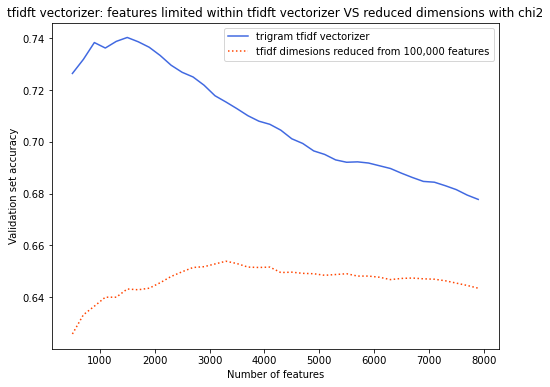

In [46]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(500,8000,200), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

scikit-learn's `TfidfVectorizer` is used to transform your training text data into TF-IDF features. Here's a brief explanation:

1. **Importing the `TfidfVectorizer`**:
   ```python
   from sklearn.feature_extraction.text import TfidfVectorizer
   ```
   This line imports the `TfidfVectorizer` class from scikit-learn, which is used to convert text data into TF-IDF features.

2. **Creating the `TfidfVectorizer` Object**:
   ```python
   vectorizer = TfidfVectorizer()
   ```
   Here, creating an instance of the `TfidfVectorizer`. This instance will be used to transform your text data into TF-IDF features.

3. **Transforming the Training Data**:
   ```python
   vectors = vectorizer.fit_transform(X_train)
   ```
   This line transforms the training data (`X_train`) into TF-IDF features using the `fit_transform` method of the `TfidfVectorizer`. The resulting `vectors` variable will contain a sparse matrix representation of the text data in the TF-IDF feature space.

4. **Checking the Shape**:
   ```python
   vectors.shape
   ```
   This line prints the shape of the `vectors` matrix, which represents the number of samples (documents or texts) and the number of features (terms) in the TF-IDF representation.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_train)
vectors.shape

(13445, 8867)

In [14]:
vectors_test = vectorizer.transform(X_test)
vectors_test.shape

(6623, 8867)

In [22]:
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,100000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

NameError: name 'nfeatures_plot_tgt' is not defined

<Figure size 576x432 with 0 Axes>

In this code, scikit-learn  is used to train a Multinomial Naive Bayes classifier (`MultinomialNB`) on the TF-IDF transformed training data (`vectors`) and then evaluating its performance on a test set (`vectors_test`) using the F1 score. Here's a breakdown of what the code does:

1. **Importing Libraries**:
   ```python
   from sklearn.naive_bayes import MultinomialNB
   from sklearn import metrics
   ```
   These lines import the necessary libraries and modules for working with the Multinomial Naive Bayes classifier and evaluating classification metrics.

2. **Initializing the Classifier**:
   ```python
   clf = MultinomialNB(alpha=.05)
   ```
   Creating an instance of the Multinomial Naive Bayes classifier (`MultinomialNB`) and set the smoothing parameter `alpha` to 0.05. This classifier will be used for text classification.

3. **Training the Classifier**:
   ```python
   classifier = clf.fit(vectors, y_train)
   ```
   Using the `fit` method to train the classifier on the TF-IDF transformed training data (`vectors`) with their corresponding labels (`y_train`).

4. **Making Predictions**:
   ```python
   pred = clf.predict(vectors_test)
   ```
   After training, using the trained classifier to make predictions on a test set (`vectors_test`). The predicted labels are stored in the `pred` variable.

5. **Evaluating Using F1 Score**:
   ```python
   metrics.f1_score(y_test, pred, average='micro')
   ```
   Calculating the F1 score for the test predictions (`pred`) compared to the true labels (`y_test`). The F1 score is calculated using the micro-average method.

   - `average='micro'`: This specifies the type of averaging to use when computing the F1 score. Micro-averaging computes the F1 score globally by considering all samples together.

The F1 score is a commonly used metric for evaluating the performance of classification models, especially in situations where class imbalance exists. It combines precision and recall to provide a balanced measure of a classifier's performance.

The code calculates the micro-averaged F1 score for the Multinomial Naive Bayes classifier on the test data and can help you assess how well the classifier is performing in the text classification task.

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB(alpha=.05)
classifier=clf.fit(vectors, y_train)
pred = clf.predict(vectors_test)
metrics.f1_score(y_test, pred, average='micro')

0.718858523327797

In this code, cikit-learn's `plot_confusion_matrix` function is used to visualize the confusion matrix of the Multinomial Naive Bayes classifier's performance on a test set. Here's a breakdown of what the code does:

1. **Importing Libraries**:
   ```python
   import matplotlib.pyplot as plt
   from sklearn.metrics import plot_confusion_matrix
   ```
   These lines import the necessary libraries and modules for plotting and displaying the confusion matrix.

2. **Setting Precision Options**:
   ```python
   np.set_printoptions(precision=2)
   ```
   This line sets the precision of floating-point numbers to 2 decimal places when displaying the confusion matrix.

3. **Defining Confusion Matrix Visualization Options**:
   ```python
   titles_options = [("Confusion matrix, without normalization", None),
                     ("Normalized confusion matrix", 'true')]
   ```
   Defining a list of tuples called `titles_options`, where each tuple contains a title for the confusion matrix and an option for normalization. The titles indicate whether the confusion matrix should be displayed with or without normalization.

4. **Looping Over Visualization Options**:
   ```python
   for title, normalize in titles_options:
       # ...
   ```
   Loop through each tuple in `titles_options` to create and display two versions of the confusion matrix: one without normalization and one with normalization.

5. **Plotting the Confusion Matrix**:
   ```python
   disp = plot_confusion_matrix(classifier, vectors_test, y_test,
                                display_labels=['Negative', 'Positive', 'Neutral'],
                                cmap=plt.cm.Blues,
                                normalize=normalize)
   ```
   Inside the loop, using the `plot_confusion_matrix` function to plot the confusion matrix. The parameters are as follows:
   - `classifier`: The trained classifier (Multinomial Naive Bayes).
   - `vectors_test`: The TF-IDF transformed test data.
   - `y_test`: The true labels for the test data.
   - `display_labels`: Labels to display on the confusion matrix.
   - `cmap`: Colormap for color-coding the matrix cells.
   - `normalize`: The normalization option based on the loop iteration.

6. **Setting the Title and Displaying the Matrix**:
   ```python
   disp.ax_.set_title(title)
   print(title)
   print(disp.confusion_matrix)
   ```
   For each confusion matrix plot, setting the title and display the matrix. The title corresponds to whether the matrix is normalized or not.

7. **Displaying the Plots**:
   ```python
   plt.show()
   ```
   After creating both confusion matrix plots, displaying them using `plt.show()`.

Confusion matrix, without normalization
[[ 545  117  517]
 [  76 1396  832]
 [ 118  202 2820]]
Normalized confusion matrix
[[0.46 0.1  0.44]
 [0.03 0.61 0.36]
 [0.04 0.06 0.9 ]]


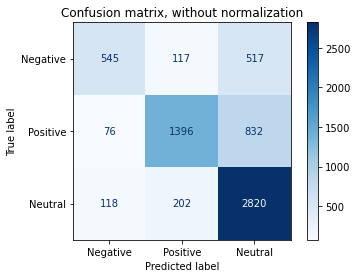

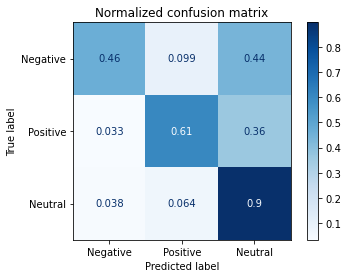

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, vectors_test, y_test,
                                 display_labels=['Negative','Positive','Neutral'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()